## Task 2: Prediction using Unsupervised ML.

### Name: Rahul Singh

### Domain: Data Science & Business Analytics

### Problem Statement: To predict the optimum number of clusters in IRIS dataset and represent it visually.

#### Dataset: IRIS dataset, https://bit.ly/3kXTdox

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading and Understanding the data

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Importing the data
data= pd.read_csv('/content/gdrive/MyDrive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Checking the value counts for species
data.Species.value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

#### Insight: All the classes have equal data points i.e. 33.33%

In [6]:
#Dropping the ID column and Species column
data.drop(['Id', 'Species'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#Checking the shape of data
data.shape

(150, 4)

In [8]:
#Checking the basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Insights:
1. All the columns are numerical and have float data type.
2. There are no missing values in the dataset.

In [9]:
#Checking the statistical information of the data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Data Visualization

In [10]:
#Column names in dataset
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

#### Univariate Analysis

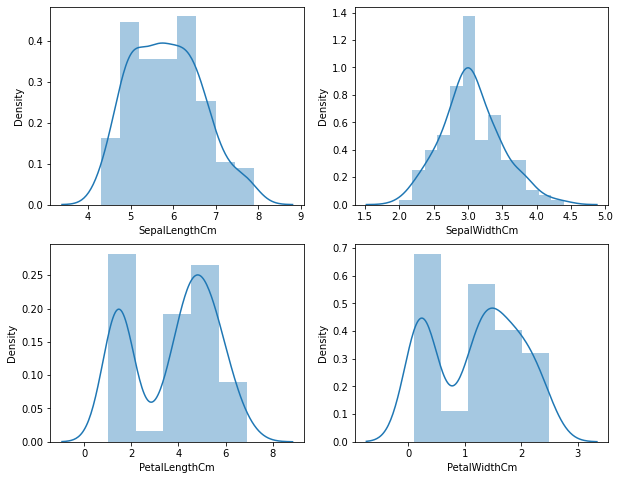

In [11]:
#Plotting distplot of all columns
col= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(data[col[0]])

plt.subplot(2,2,2)
sns.distplot(data[col[1]])

plt.subplot(2,2,3)
sns.distplot(data[col[2]])

plt.subplot(2,2,4)
sns.distplot(data[col[3]])

plt.show()

#### Insight: All the columns have different range, so scaling is required

Bivariate Analysis

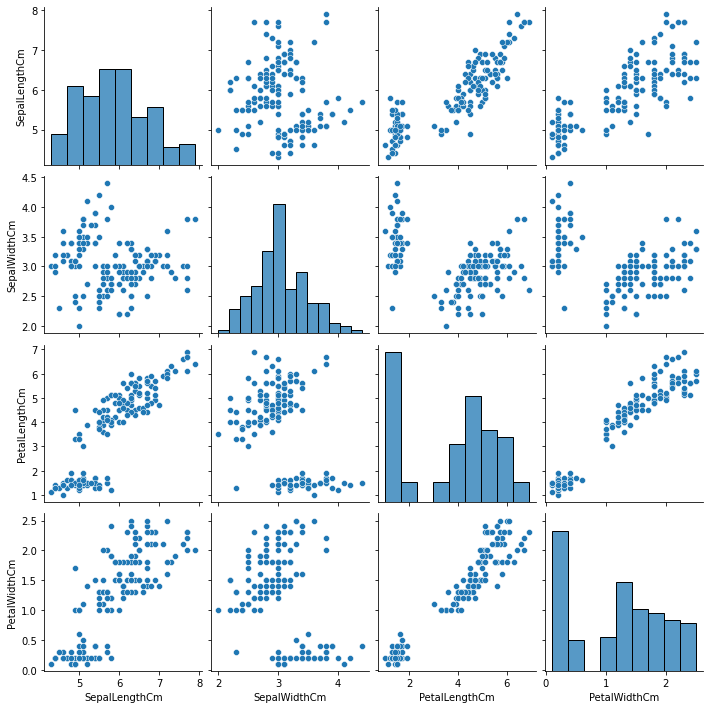

In [12]:
#Checking the relationship between columns using pairplot
sns.pairplot(data)
plt.show()

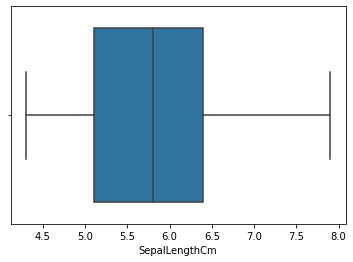

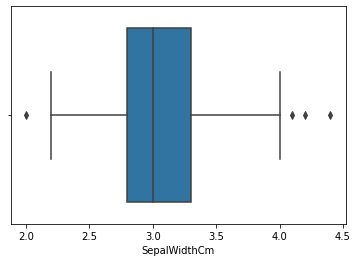

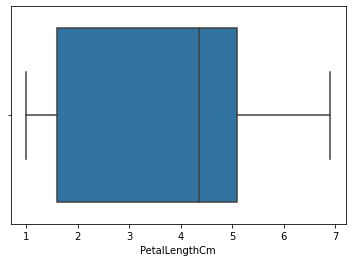

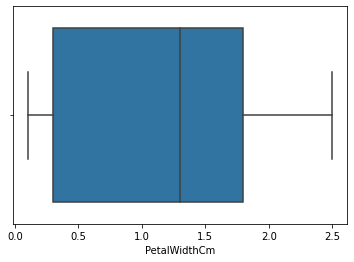

In [13]:
#Checking the outliers in data
for c in col:
  sns.boxplot(data[c])
  plt.show()

#### Data preprocessing for model building

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


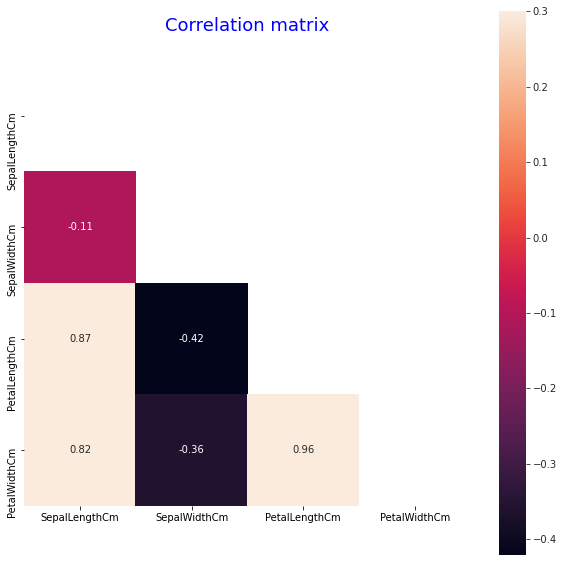

In [15]:
# Plotting a heat map 
corr = data.corr()
title = "Correlation matrix"
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
plt.title(title, fontsize = 18, color="Blue")
ttl = ax.title
ttl.set_position([0.5,1.05])
with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmax=.3, square=True);

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_scaled= scaler.fit_transform(data)
df= pd.DataFrame(data_scaled)
df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
df.columns= data.columns
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### K-Means Method

In [18]:
## Creating function to calculate Hopkins value to determine clustering tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
#Calculating hopkins satistics
hopkins(df)

0.8325591867180726

#### Insight: The hopkins score is 84.5 % which signifies very good tendency for Clustering.

In [20]:
#Performing K-Means algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

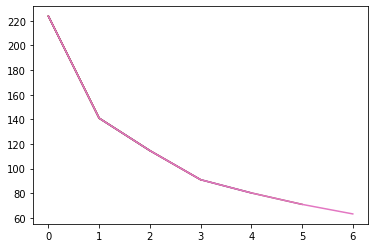

In [21]:
ssd=[]
range_n_clusters= [2,3,4,5,6,7,8]
for num in range_n_clusters:
    kmeans= KMeans(n_clusters=num, max_iter=100)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
    plt.plot(ssd)

In [22]:
#Calculating silhouette score for varying cluster values
range_n_clusters= [2,3,4,5,6,7,8]
for num in range_n_clusters:
    kmeans= KMeans(n_clusters=num, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels= kmeans.labels_
    
    silhoutte_avg= silhouette_score(df, cluster_labels)
    
    print("For n_cluster= {0}, the silhouette_score is {1}".format(num, silhoutte_avg))

For n_cluster= 2, the silhouette_score is 0.580184463257396
For n_cluster= 3, the silhouette_score is 0.4589717867018717
For n_cluster= 4, the silhouette_score is 0.3854851300558946
For n_cluster= 5, the silhouette_score is 0.3431132690481162
For n_cluster= 6, the silhouette_score is 0.3260759517825793
For n_cluster= 7, the silhouette_score is 0.3349387869158587
For n_cluster= 8, the silhouette_score is 0.3432416405803637


#### From above, the number of clusters should be 3.

In [23]:
kmeans= KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df.values)
cluster_labels= kmeans.labels_

y_kmeans= kmeans.fit_predict(df.values)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [24]:
data['kmeans_id']= cluster_labels
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
data.kmeans_id.value_counts(normalize=True)

2    0.346667
1    0.333333
0    0.320000
Name: kmeans_id, dtype: float64

### The optimum number of clusters is 3.

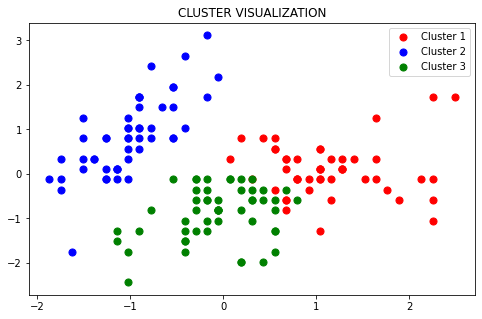

In [26]:
# VIsualizing the clusters
plt.figure(figsize=(8,5))
plt.scatter(df.values[y_kmeans==0, 0], df.values[y_kmeans==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(df.values[y_kmeans==1, 0], df.values[y_kmeans==1, 1], s=50, c='blue', label ='Cluster 2')
plt.scatter(df.values[y_kmeans==2, 0], df.values[y_kmeans==2, 1], s=50, c='green', label ='Cluster 3')
plt.title("CLUSTER VISUALIZATION")
plt.legend()
plt.show()

# Thank You